In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("restaurant reviews.csv")

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(1000, 2)

In [5]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
data.duplicated().sum()

6

In [7]:
df = data.drop_duplicates()

In [8]:
df.shape

(994, 2)

In [9]:
df['Liked'].value_counts()

1    498
0    496
Name: Liked, dtype: int64

In [10]:
df['Review'] = df['Review'].str.lower()

In [17]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [18]:
df['Review'] = df['Review'].str.replace(f"[{string.punctuation}]", "", regex=True)

In [19]:
df['tokens'] = df['Review'].apply(word_tokenize)

In [35]:
import re
def is_purely_alphabetic(token):
    return re.match("^[A-Za-z]+$", token) is not None

In [36]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words and not word.isnumeric() and is_purely_alphabetic(word)])

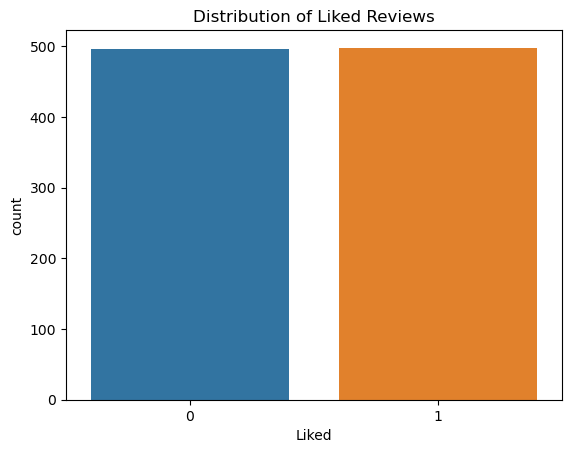

In [37]:
sns.countplot(x='Liked', data=df)
plt.title('Distribution of Liked Reviews')
plt.show()

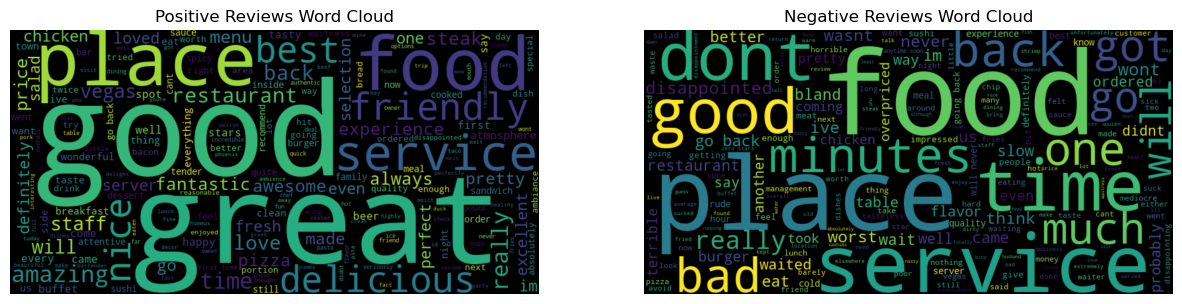

In [38]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = df[df['Liked'] == 1]['Review'].str.cat(sep=' ')
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = df[df['Liked'] == 0]['Review'].str.cat(sep=' ')
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [40]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [41]:
# Join tokens back into strings
df['processed_review'] = df['tokens'].apply(lambda x: ' '.join(x))

In [42]:
# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform the data
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_review'])
y = df['Liked']

In [43]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Total feature names (words) in the TF-IDF vectorizer:")
print(feature_names)

# display the number of feature names
print("\nTotal number of features:", len(feature_names))

Total feature names (words) in the TF-IDF vectorizer:
['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']

Total number of features: 1926


In [44]:
for i, feature in enumerate(feature_names):
    print(f"{i}: {feature}")

0: absolute
1: absolutely
2: absolutley
3: accident
4: accommodations
5: accomodate
6: accountant
7: ache
8: acknowledged
9: across
10: actual
11: actually
12: added
13: affordable
14: afternoon
15: ago
16: ahead
17: airline
18: airport
19: ala
20: albondigas
21: allergy
22: almonds
23: almost
24: alone
25: also
26: although
27: always
28: amazing
29: amazingrge
30: ambiance
31: ambience
32: amount
33: ample
34: andddd
35: angry
36: another
37: anticipated
38: anymore
39: anyone
40: anything
41: anytime
42: anyway
43: anyways
44: apart
45: apologize
46: apology
47: app
48: appalling
49: apparently
50: appealing
51: appetite
52: appetizer
53: appetizers
54: apple
55: approval
56: area
57: arent
58: arepas
59: aria
60: around
61: array
62: arrived
63: arrives
64: arriving
65: article
66: ask
67: asked
68: asking
69: assure
70: ate
71: atmosphere
72: atrocious
73: attached
74: attack
75: attention
76: attentive
77: attitudes
78: auju
79: authentic
80: average
81: avocado
82: avoid
83: avo

In [45]:
# Convert the sparse matrix to a dense matrix
dense_matrix = X_tfidf.todense()

# Convert the dense matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(dense_matrix, columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X_tfidf.shape)

# Display a sample of the TF-IDF scores
tfidf_sample = tfidf_df.head()
print(tfidf_sample)

TF-IDF matrix shape: (994, 1926)
   absolute  absolutely  absolutley  accident  accommodations  accomodate  \
0       0.0         0.0         0.0       0.0             0.0         0.0   
1       0.0         0.0         0.0       0.0             0.0         0.0   
2       0.0         0.0         0.0       0.0             0.0         0.0   
3       0.0         0.0         0.0       0.0             0.0         0.0   
4       0.0         0.0         0.0       0.0             0.0         0.0   

   accountant  ache  acknowledged  across  ...  yelpers  yet  youd  youll  \
0         0.0   0.0           0.0     0.0  ...      0.0  0.0   0.0    0.0   
1         0.0   0.0           0.0     0.0  ...      0.0  0.0   0.0    0.0   
2         0.0   0.0           0.0     0.0  ...      0.0  0.0   0.0    0.0   
3         0.0   0.0           0.0     0.0  ...      0.0  0.0   0.0    0.0   
4         0.0   0.0           0.0     0.0  ...      0.0  0.0   0.0    0.0   

   youre  yucky  yukon  yum  yummy  zero 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.7638190954773869
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       100
           1       0.75      0.79      0.77        99

    accuracy                           0.76       199
   macro avg       0.76      0.76      0.76       199
weighted avg       0.76      0.76      0.76       199



In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [48]:
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['processed_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [49]:
threshold = 0.0  # Adjust threshold as per your analysis
df['predicted_sentiment2'] = df['sentiment_score'].apply(lambda x: 1 if x > threshold else 0)

In [50]:
df['Liked'] = df['Liked'].astype(int)  # Ensure it is of integer type for comparison

# Calculate accuracy
accuracy = (df['predicted_sentiment2'] == df['Liked']).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [58]:
model2 = LogisticRegression(C=0.5, penalty='l2', max_iter=200)
model2.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.7638190954773869
Confusion Matrix:
 [[74 26]
 [21 78]]
